# Virtual Rat learning curve and switch cost vs. time

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from model.VirtualRatFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("TrainingTime/TrainingTime-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [3]:
num_fine = 251
pro_block_matrix_fine, pro_switch_matrix_fine, anti_block_matrix_fine, anti_switch_matrix_fine \
    = np.zeros((0,num_fine)),np.zeros((0,num_fine)),np.zeros((0,num_fine)),np.zeros((0,num_fine))
for i in range(100):
    try:
        matrices = load_weights("TrainingTime/TrainingTimeFine-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix_fine = np.append(pro_block_matrix_fine, pro_block,axis=0)
    anti_block_matrix_fine = np.append(anti_block_matrix_fine, anti_block,axis=0)
    pro_switch_matrix_fine = np.append(pro_switch_matrix_fine, pro_switch,axis=0)
    anti_switch_matrix_fine = np.append(anti_switch_matrix_fine, anti_switch,axis=0)
matrices_fine = [pro_block_matrix_fine,anti_block_matrix_fine,pro_switch_matrix_fine,anti_switch_matrix_fine]

In [4]:
threshold= 0.9

good = np.logical_and(pro_block_matrix[:,-1] > threshold,  anti_block_matrix[:,-1] > threshold)

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]
good_pro_block_fine = pro_block_matrix_fine[good,:]
good_anti_block_fine = anti_block_matrix_fine[good,:]
good_pro_switch_fine = pro_switch_matrix_fine[good,:]
good_anti_switch_fine = anti_switch_matrix_fine[good,:]
good_matrices_fine = [good_pro_block_fine, good_pro_switch_fine, 
                good_anti_block_fine, good_anti_switch_fine]

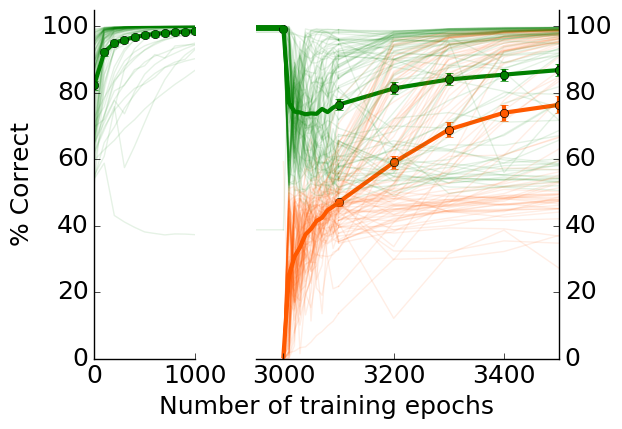

In [64]:
accuracy_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, matrices_fine = good_matrices_fine,\
                 individual = True, xlim1=(0,1000), xlim2=(2950,3500), filename="figures/learning_curve.pdf")

In [6]:
threshold_edge = 0.85
large_enough = np.logical_and(pro_block_matrix > threshold_edge, anti_block_matrix > threshold_edge)
time_steps = []
for i in range(large_enough.shape[0]):
    for j in range(large_enough.shape[1]):
        if large_enough[i,j]:
            time_steps.append((i,j))
            break
print time_steps

[(1, 33), (2, 33), (3, 33), (4, 32), (5, 32), (6, 34), (8, 32), (9, 32), (10, 65), (11, 53), (13, 46), (14, 33), (15, 37), (16, 42), (17, 33), (18, 50), (19, 55), (20, 32), (21, 38), (22, 42), (23, 34), (24, 40), (25, 37), (26, 72), (27, 36), (28, 32), (29, 35), (30, 33), (31, 37), (32, 33), (33, 34), (34, 50), (35, 49), (36, 37), (37, 36), (38, 34), (39, 37), (40, 59), (41, 32), (42, 32), (43, 34), (44, 69), (45, 41), (46, 58), (47, 48), (48, 32), (50, 34), (51, 34), (52, 44), (53, 41), (54, 85), (55, 36), (57, 40), (58, 33), (59, 33), (61, 34), (62, 37), (63, 34), (64, 33), (65, 32), (66, 37), (67, 32), (68, 32), (69, 36), (70, 32), (71, 55), (72, 33), (73, 34), (74, 40), (75, 33), (76, 44), (77, 34), (78, 32), (79, 37), (80, 32), (81, 33), (83, 33), (84, 39), (85, 32), (86, 47), (87, 33), (88, 47), (89, 44), (90, 48), (91, 33), (92, 37), (93, 33), (94, 32), (95, 34), (96, 35), (98, 36), (99, 33)]


In [7]:
save_weights("pkls/time_steps_for_3d-0.85.pkl",time_steps)

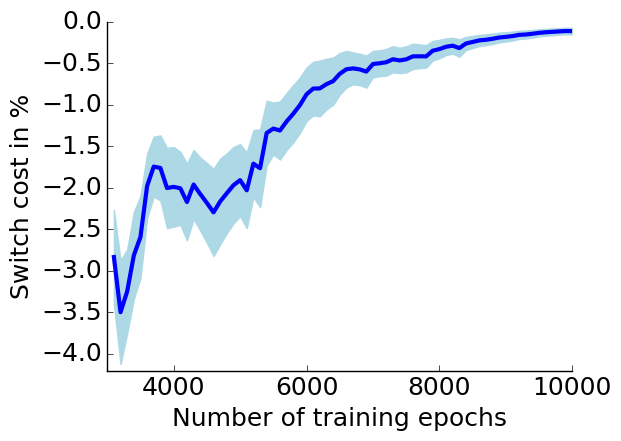

In [26]:
switch_cost_vs_time(epoch_per_loop, num_loop, matrices = good_matrices, \
                    individual = False, combine = True, filename='figures/switch_cost_vs_time.pdf')